# Exercise Set 2 - Linear Regression
**FYS-2021 Exercises**  
Department of Physics and Technology  
Faculty of Science and Technology  



## Problem 1

**(1a)** Go to the website [least squares loss](https://udlbook.github.io/udlfigures/), choose on the left "least squares loss" and play with this interactive example of linear regression. Find the best intercept and slope that minimize the loss.

Did you reach the minimum by changing the parameters doing small steps while looking at the loss value? Did you change the slider direction when the loss was increasing? If yes, it looks like you intuitively performed gradient descent!



## Problem 2

The data file `global-temperatures.csv` contains the average global annual temperatures spanning from the year 1880 to 2017.

**(2a)** Use the file from Canvas and perform linear regression, with temperature as a function of years, and plot the results.


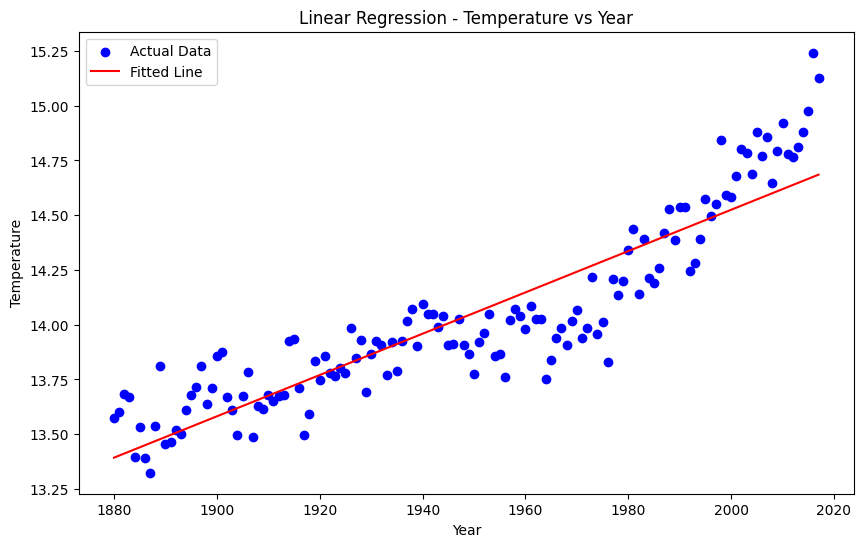

In [53]:
# Code to perform linear regression and plot results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('global-temperatures.csv', skiprows=7, delimiter=' ')

# Prepare the data
X = data['Year'].values.reshape(-1, 1)
y = data['Temperature'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Linear Regression - Temperature vs Year')
plt.legend()
plt.show()



**(2b)** Briefly explain what the R² value tells you, and calculate the R² value for this model.

$R^2$ (R-squared), also known as the coefficient of determination, is a statistical measure used in regression analysis to assess how well a model explains the variation in \(y\) (the dependent variable). 

$R^2$ ranges between 0 and 1:
- $R^2 = 0$: The model explains none of the variation, meaning it fails to capture the patterns in the data.
- $R^2 = 1$: The model explains all the variation, perfectly predicting all values.
- $R^2$ close to 0: The model explains little or no variation in the data.
- $R^2$ close to 1: The model explains most of the variation in the data.

In general, a high $R^2$ value is desirable because it indicates that the model explains a large portion of the variation in the data. A high $R^2$ also suggests that the model has strong predictive power and captures important relationships between the independent and dependent variables. However, an extremely high $R^2$ (very close to 1) can indicate overfitting, especially if the model has too many independent variables or is too complex relative to the amount of data. Overfitting means the model fits the training data very well but does not generalize well to new, unseen data.

In [54]:
# Code to calculate R² value
r2 = r2_score(y, y_pred)
print(f'R² value: {r2}')


R² value: 0.8145436075330897



**(2c)** Assuming the regression model is of the form $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$, what is the interpretation of the estimator $\hat{\beta}_1$?

The estimator β^1β^​1​ represents the estimated change in the dependent variable yiyi​ for a one-unit increase in the independent variable xixi​, holding all other factors constant. In other words, β^1β^​1​ is the slope of the regression line, indicating how much yiyi​ is expected to change when xixi​ increases by one unit.


**(2d)** Plot the residuals and comment on the result with regards to the assumptions made in the regression model.


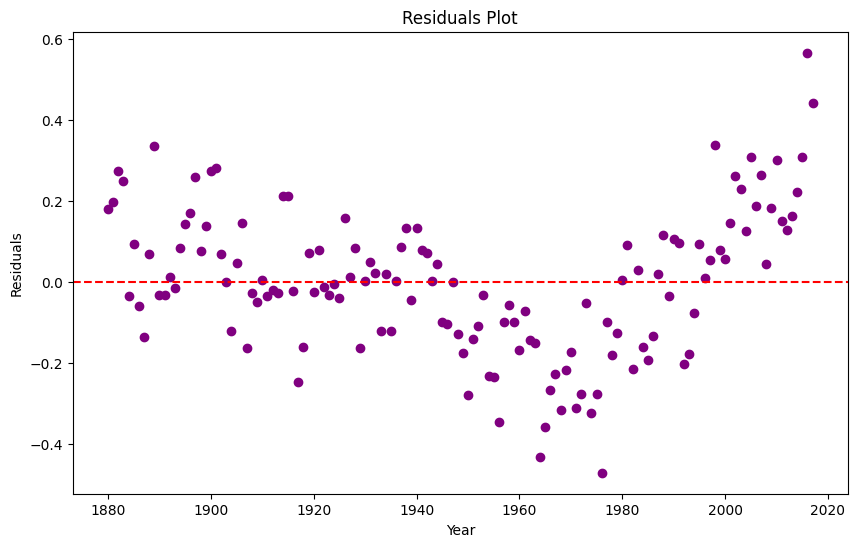

In [55]:
# Code to plot residuals
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()



## Problem 3

In this problem, we will use multiple linear regression to predict the fuel consumption of cars (measured in miles per gallon). The available predictors are:
- (i) cylinders
- (ii) displacement
- (iii) horsepower
- (iv) weight
- (v) acceleration
- (vi) model year

The dataset is named `auto-mpg.csv`, and can be found in Canvas.

**(3a)** Implement your own function for estimating the linear-regression parameters, and use this to fit a regression model to the fuel-consumption data.


In [56]:
# Custom function to estimate linear regression parameters
def linear_regression(X, y):
    # Add a column of ones to include the intercept (β₀)
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # Calculate coefficients using the Normal Equation
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

# Load the auto-mpg dataset
auto_data = pd.read_csv('auto-mpg.csv', skiprows=2, delimiter='\\s+')

# Prepare the data (e.g., select relevant features)
X_auto = auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model']].values
y_auto = auto_data['mpg'].values

# Estimate the parameters
beta_auto = linear_regression(X_auto, y_auto)
print(f'Estimated coefficients: {beta_auto}')


Estimated coefficients: [-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04
 -6.79461791e-03  8.52732469e-02  7.53367180e-01]



**(3b)** Explain why the magnitudes of the estimated coefficients are so different. What could be done to prevent this from happening?



**(3c)** Compute R² and use this to evaluate the quality of your model.


In [57]:
# Code to calculate R² for auto-mpg model
y_auto_pred = np.column_stack((np.ones(X_auto.shape[0]), X_auto)) @ beta_auto
r2_auto = r2_score(y_auto, y_auto_pred)
print(f'R² value: {r2_auto}')


R² value: 0.8092552890383932



**(3d)** Experiment with removing different predictors from the model. Do you think all predictors are equally necessary? Explain.
